<a href="https://colab.research.google.com/github/evertonEm/numero-secreto/blob/main/Projeto_4_inicio_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [24]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934

from datetime import datetime

dados["idade"] = datetime.today().year - dados["ano_do_modelo"]

dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)

In [25]:
x = dados[["preco", "idade", "km_por_ano"]]
y = dados["vendido"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 63457

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED , stratify = y)

print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 69.88%


In [27]:
'''Usamos um DummyClassifier para estabelecer uma linha de base de desempenho.
Este modelo faz previsões aleatórias com base na distribuição de classes.
Ele nos ajuda a entender o quão melhor um modelo mais sofisticado precisa ser em comparação com uma previsão aleatória.'''
from sklearn.dummy import DummyClassifier

# DummyClassifier

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

classificador = DummyClassifier(strategy='stratified')
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia do dummy foi de 51.76%


In [28]:
'''Após estabelecer a linha de base, aplicamos um modelo SVC com os dados normalizados por um StandardScaler.
A normalização é importante para modelos baseados em kernel como o SVM para melhorar seu desempenho e acurácia.'''
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 75.92%


In [29]:
'''Finalmente, tentamos um modelo LinearSVC, que é uma versão do SVM que lida com classificações lineares.
Este modelo também é aplicado sobre dados normalizados e a acurácia é calculada para comparar com o modelo anterior.'''
from sklearn.svm import LinearSVC

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 69.92%


In [30]:
'''Em seguida, testamos um DecisionTreeClassifier para avaliar como um modelo baseado em árvore de decisão se comporta com os mesmos dados.
Escolhemos uma profundidade máxima para a árvore para evitar sobreajuste.'''
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

A acurácia foi de 78.40%


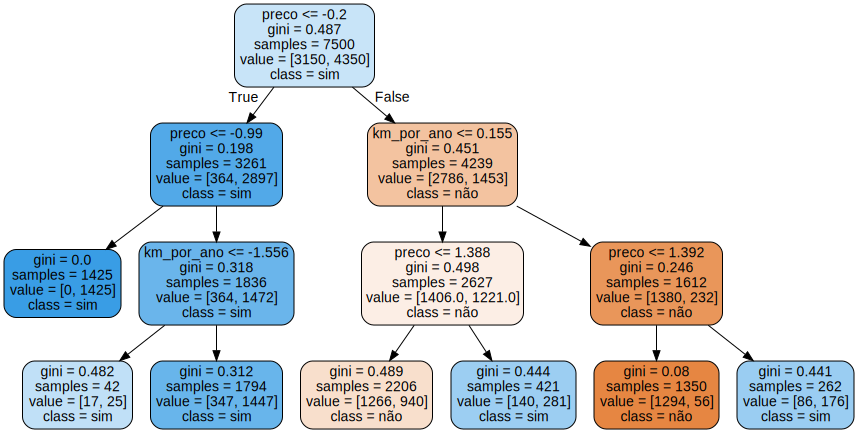

In [31]:
'''Finalmente, visualizamos a árvore de decisão gerada para entender as regras de divisão que o modelo aprendeu.'''
from sklearn.tree import export_graphviz
import graphviz

estrutura = export_graphviz(modelo, filled=True, rounded=True,
                            feature_names=x.columns,
                            class_names=["não", "sim"])
grafico = graphviz.Source(estrutura)
grafico